In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv ('/content/drive/MyDrive/Praktikum_EDA/Data/Salary_Data_Tugas_EDA.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


**LATIHAN 1**

In [2]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)

Ukuran dataset (baris, kolom): (6707, 6)


In [3]:
print("Jumlah total elemen:", df.size)

Jumlah total elemen: 40242


In [4]:
# Mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable:", type(my_variable))
my_number = 123
print("Tipe data my_number:", type(my_number))


Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>


In [5]:
# Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)



Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [7]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [12]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
  print("\nBeberapa baris duplikat pertama:")
  display(df[df.duplicated (keep=False)].head())

Jumlah baris duplikat: 4913

Beberapa baris duplikat pertama:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
140,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
194,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
208,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0


**LATIHAN 2**

In [13]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)


Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


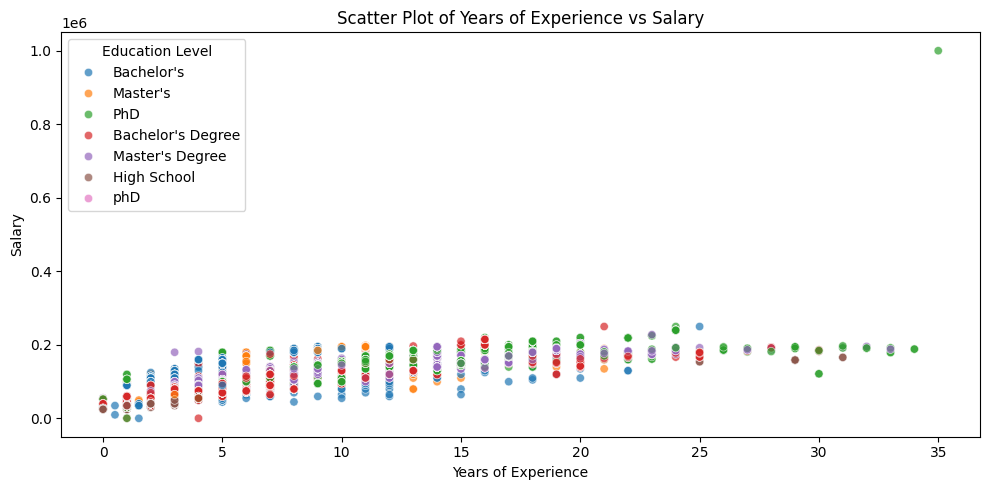

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara Years of Experience dan Salary
numerical_cols_scatter = ['Years of Experience', 'Salary']

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,
                x=numerical_cols_scatter[0],
                y=numerical_cols_scatter[1],
                hue='Education Level',  # diberi warna berdasarkan tingkat pendidikan
                alpha=0.7)

plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()


**LATIHAN 3**

In [16]:
# Mengisi nilai yang hilang pada kolom 'Years of Experience' dengan median
experience_median = df['Years of Experience'].median()
print(f"Median dari kolom 'Years of Experience': {experience_median}")

df['Years of Experience'] = df['Years of Experience'].fillna(experience_median)

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom tersebut
missing_values_after_fill = df['Years of Experience'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Years of Experience' setelah pengisian: {missing_values_after_fill}")

Median dari kolom 'Years of Experience': 7.0

Jumlah nilai yang hilang di kolom 'Years of Experience' setelah pengisian: 0


In [18]:
# Menghapus baris duplikat jika ada
duplicate_rows_count = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus
if duplicate_rows_count > 0:
    print("Menghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi ulang
duplicate_rows_count_after = df.duplicated().sum()
print(f"Jumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# ----------------------------------------------------------------------
# Tampilkan beberapa baris pertama setelah pembersihan
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama DataFrame setelah pengisian dan penghapusan duplikat:")
    display(df.head())



Jumlah baris duplikat: 0
Jumlah baris duplikat setelah penghapusan: 0


In [20]:
# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())


Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,Age,Years of Experience,Salary
count,1794.000000,1794.000000,1790.000000
mean,35.140468,9.159699,113668.149162
std,8.232829,6.862830,55695.750262
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


/tmp/ipython-input-2691893124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].str.lower().str.strip()



Distribusi kolom 'Job Title' setelah standardisasi:
Job Title
software engineer manager    127
full stack engineer          123
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
developer                      1
social m                       1
social media man               1
delivery driver                1
intern                         1
Name: count, Length: 193, dtype: int64


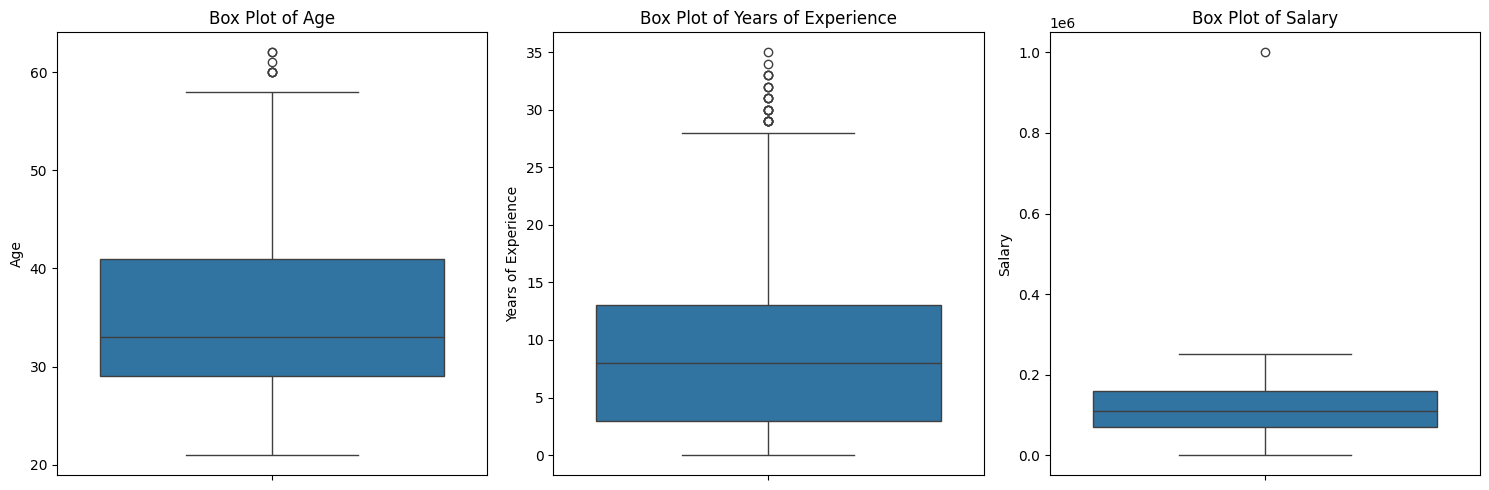

In [22]:
df['Job Title'] = df['Job Title'].str.lower().str.strip()

# Verifikasi setelah standardisasi
print("\nDistribusi kolom 'Job Title' setelah standardisasi:")
print(df['Job Title'].value_counts())

# ===============================
# 6. Visualisasi kolom numerik untuk mendeteksi outlier (Box Plot)
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik yang relevan
numerical_cols_outliers = ['Age', 'Years of Experience', 'Salary']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Statistik deskriptif untuk 'Salary' setelah capping (upper_limit = upper_limit=20000000):


/tmp/ipython-input-899883547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = df['Salary'].clip(upper=upper_limit)


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000


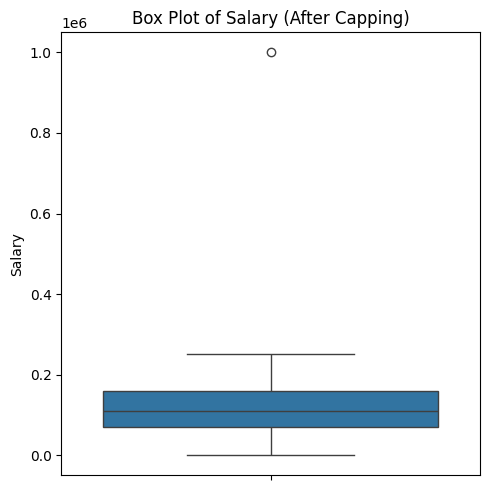

In [24]:
upper_limit = 20000000
df['Salary'] = df['Salary'].clip(upper=upper_limit)

print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper_limit = {upper_limit=}):")
display(df['Salary'].describe())

#Visualisasi 'Salary' setelah capping  (Box Plot)
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary (After Capping)')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [27]:
# dataset ini gapunya kolom tanggal,
# jadi kita tidak perlu memecah kolom jadi tahun/bulan/hari.

# Simpan hasil data bersih ke file Excel
output_file_name = 'data_bersih_Salary.xlsx'
df.to_excel(output_file_name, index=False)

print(f"DataFrame telah berhasil disimpan ke '{output_file_name}'")


DataFrame telah berhasil disimpan ke 'data_bersih_Salary.xlsx'


Cleaning Data

In [29]:
# Hitung jumlah nilai hilang di setiap kolom sebelum penghapusan
missing_values_before = df.isnull().sum()
print("Jumlah nilai hilang sebelum penghapusan:")
print(missing_values_before)

# Hapus baris yang memiliki nilai hilang (jika ada)
df_dropped = df.dropna().copy()

# Verifikasi kembali setelah penghapusan
missing_values_after = df_dropped.isnull().sum()
print("\nJumlah nilai hilang setelah penghapusan:")
print(missing_values_after)

# Tampilkan beberapa baris awal setelah penghapusan nilai hilang
print("\nBeberapa baris pertama setelah penghapusan nilai hilang:")
display(df_dropped.head())

print(f"\nUkuran DataFrame setelah penghapusan nilai hilang: {df_dropped.shape}")



Jumlah nilai hilang sebelum penghapusan:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    0
Salary                 4
dtype: int64

Jumlah nilai hilang setelah penghapusan:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Beberapa baris pertama setelah penghapusan nilai hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,software engineer,5.0,90000.0
1,28,Female,Master's,data analyst,3.0,65000.0
2,45,Male,PhD,senior manager,7.0,150000.0
3,36,Female,Bachelor's,sales associate,7.0,60000.0
4,52,Male,Master's,director,20.0,200000.0



Ukuran DataFrame setelah penghapusan nilai hilang: (1788, 6)


In [31]:
# DETEKSI DAN HAPUS OUTLIER

# Misalnya kita anggap gaji di atas 200.000 dianggap outlier (bisa disesuaikan)
upper_limit = 200000

# Hitung jumlah baris sebelum penghapusan outlier
rows_before = len(df_dropped)
print(f"\nJumlah baris sebelum menghapus outlier: {rows_before}")

# Hapus baris di mana 'Salary' lebih besar dari batas atas
df_no_outliers = df_dropped[df_dropped['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after = len(df_no_outliers)
print(f"Jumlah baris setelah menghapus outlier: {rows_after}")
print(f"Jumlah baris yang dihapus karena outlier: {rows_before - rows_after}")

# Statistik deskriptif setelah penghapusan outlier
print("\nStatistik deskriptif 'Salary' setelah menghapus outlier:")
print(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris awal setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())

# SIMPAN DATA HASIL BERSIH

output_file_name = 'salary_data_bersih.xlsx'
df_no_outliers.to_excel(output_file_name, index=False)

print(f"\nDataFrame bersih telah berhasil disimpan ke '{output_file_name}'")



Jumlah baris sebelum menghapus outlier: 1788
Jumlah baris setelah menghapus outlier: 1766
Jumlah baris yang dihapus karena outlier: 22

Statistik deskriptif 'Salary' setelah menghapus outlier:
count      1766.000000
mean     111936.572480
std       50535.678135
min         350.000000
25%       68641.250000
50%      110000.000000
75%      155000.000000
max      200000.000000
Name: Salary, dtype: float64

Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,software engineer,5.0,90000.0
1,28,Female,Master's,data analyst,3.0,65000.0
2,45,Male,PhD,senior manager,7.0,150000.0
3,36,Female,Bachelor's,sales associate,7.0,60000.0
4,52,Male,Master's,director,20.0,200000.0



DataFrame bersih telah berhasil disimpan ke 'salary_data_bersih.xlsx'


**LATIHAN 5**

In [33]:
correlation = df['Years of Experience'].corr(df['Salary'])
print(f"Koefisien korelasi antara 'Years of Experience' dan 'Salary': {correlation}")

Koefisien korelasi antara 'Years of Experience' dan 'Salary': 0.7887776443322252


In [35]:
r_squared = correlation**2
print(f"\nKoefisien determinasi (R-squared) antara 'Years of Experience' dan 'Salary': {r_squared}")


Koefisien determinasi (R-squared) antara 'Years of Experience' dan 'Salary': 0.6221701721982943


Hasil uji Shapiro-Wilk: statistic= nan, p-value= nan
Data tidak berdistribusi normal (menolak H0)


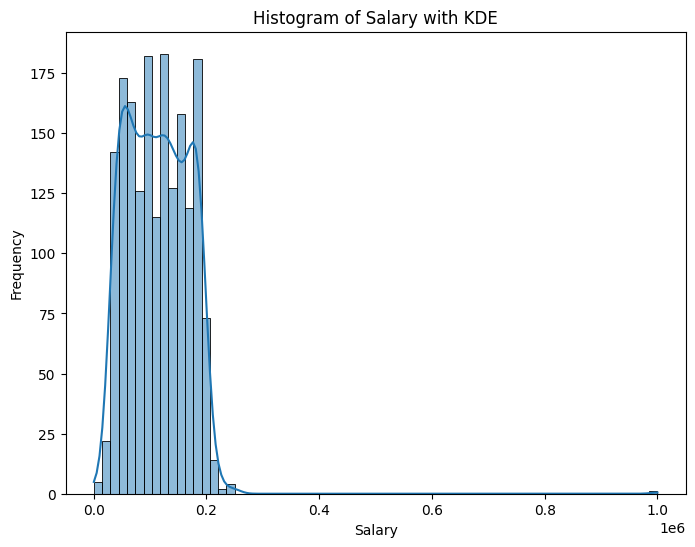

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Salary'])
print(f"Hasil uji Shapiro-Wilk: statistic={shapiro_test.statistic:4f}, p-value={shapiro_test.pvalue:4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
  print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
  print("Data tidak berdistribusi normal (menolak H0)")
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Histogram of Salary with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()